In [1]:
import os
%load_ext autoreload
%autoreload 2

# Imports

In [3]:
import numpy as np
import pandas as pd
from numpy import logical_and as land

from utilities import to_float, eval_correlation, plot_hist, plot_boxplot, get_path

In [4]:
DATA_PATH = get_path()

In [5]:
plot_path = 'dataUnderstandingPre/'
try:
    os.mkdir(plot_path)
except FileExistsError:
    pass
try:
    os.mkdir(plot_path+'users')
except FileExistsError:
    pass
try:
    os.mkdir(plot_path+'tweets')
except FileExistsError:
    pass

In [6]:
df_users = pd.read_csv(DATA_PATH+"users.csv")

In [7]:
df_tweet = pd.read_csv(DATA_PATH+"tweets.csv")

# User analysis

In [8]:
df_users.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


C:\Users\al\AppData\Local\Temp\ipykernel_13116\264849779.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_users.info(null_counts=True)


## Language field

There are some mispellings, so we are going to replace the mispelled ones to the correct ones, which are:
- en-gb to en-GB
- zh-tw to zh-TW

There are also two wrong values, 'Select Language...' and 'xx-lc', related to three users in total.

In [9]:
df_users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

## Bot field
There are more users who are bots than genuine users in the dataset.

In [10]:
df_users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Statuses count field

The distribution shows that the mean is near the 95th percentile, while the median lies near the 25th percentile. The mean could be influenced by outliers.

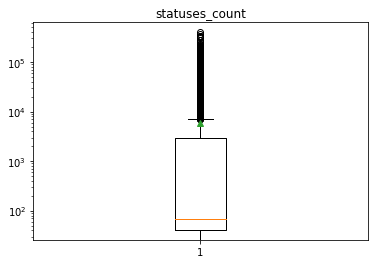

In [11]:
# Plot the log-scaled values in a boxplot
plot_boxplot(df_users, 'statuses_count', log=True, out_path=plot_path+'users/boxplot_statuses_count_pre.png')

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()


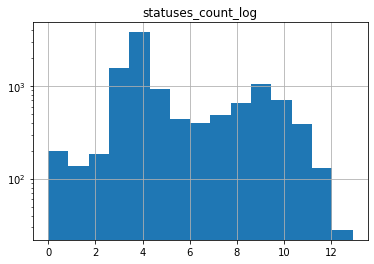

In [12]:
plot_hist(df_users[df_users['statuses_count']!=np.inf], 'statuses_count', log=True, out_path=plot_path+'users/hist_statuses_count_pre.png')

For users with a non-null `statuses_count`, find the mean and median of this attribute.
As it is possible to see, this also shows that the mean is probably affected by the presence of a lot of outliers.

In [13]:
print(f"mean: {df_users.statuses_count.mean()}")
print(f"median: {df_users.statuses_count.median()}")
print(f"max: {df_users.statuses_count.max()}")

mean: 5883.312359348276
median: 68.0
max: 399555.0


## Created_at field

In [14]:
# Convert date to seconds
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)

Mean and median lie more or less in the same area around the years 2017/2018. From the boxplot and histogram it is possible to see that the data is more skewed towards more recent dates.

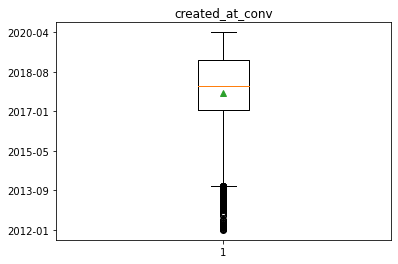

In [15]:
plot_boxplot(df_users, 'created_at_conv', date=True, out_path=plot_path+'users/boxplot_created_at_pre.png')

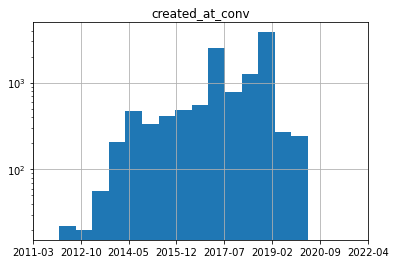

In [16]:
plot_hist(df_users[df_users['created_at_conv']!=np.inf], 'created_at_conv', date=True, out_path=plot_path+'users/boxplot_created_at_pre.png')

In [17]:
print(f"mean: {pd.to_datetime(df_users.created_at_conv.mean())}\n"
      f"median: {pd.to_datetime(df_users.created_at_conv.median())}\n"
      f"min: {pd.to_datetime(df_users.created_at_conv.min())}\n"
      f"max: {pd.to_datetime(df_users.created_at_conv.max())}")


mean: 2017-10-03 21:23:16.013114368
median: 2018-01-30 17:20:36
min: 2012-01-24 01:57:38
max: 2020-04-21 07:28:31


The oldest date in the dataset is from the year 2012, while the most recent is from 2020.

## Correlation Matrix

In [18]:
df_corr = df_users.copy()
# Drop categorical values
df_corr.drop(columns=['id', 'name', 'lang', 'bot'], inplace=True)
# Drop incorrect or null values
df_corr = df_corr[land(land(df_corr['statuses_count'] != -1, ~df_corr['statuses_count'].isnull()), df_corr['statuses_count'] != np.inf)]
df_corr['created_at'] = pd.to_datetime(df_corr['created_at']).astype(np.int64)
df_corr.drop(columns=['created_at_conv'], inplace=True)

No particular correlation can be seen among the attributes.

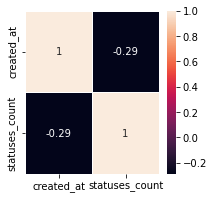

In [19]:
eval_correlation(df_corr, 'pearson',figsize=(3,3))

# Tweets analysis

In [20]:
# Total number of tweets
df_tweet.shape[0]

13664696

There are null values in all the attributes except for `created_at` column. Also most of the attributes should be numerical but they are saved as 'object' so there could be some erroneous values.

In [21]:
df_tweet.info(null_counts=True)

C:\Users\al\AppData\Local\Temp\ipykernel_13116\899680598.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweet.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 1.0+ GB


## Counters analysis

In [22]:
# Cast numerical attributes to float
attributes = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']
for attr in attributes:
    df_tweet[attr] = df_tweet[attr].apply(to_float)

In [23]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   user_id         object 
 2   retweet_count   float64
 3   reply_count     float64
 4   favorite_count  float64
 5   num_hashtags    float64
 6   num_urls        float64
 7   num_mentions    float64
 8   created_at      object 
 9   text            object 
dtypes: float64(6), object(4)
memory usage: 1.0+ GB


We have noticed a lot of huge values in the all the counter columns.

All the counters seem to have a skewed distribution where the most frequent value is 0. We also noticed that there are some outliers with huge values in fact columns have been plotted on a logarithmic scale to make the information more understandable.

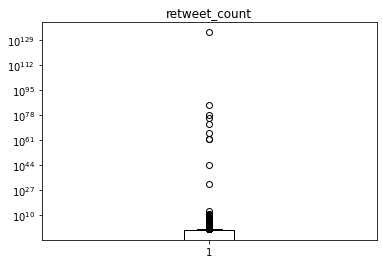

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


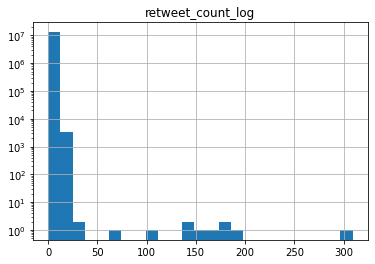

In [24]:
plot_boxplot(df_tweet, 'retweet_count', log=True)
plot_hist(df_tweet[df_tweet['retweet_count']!=np.inf], 'retweet_count', log=True)

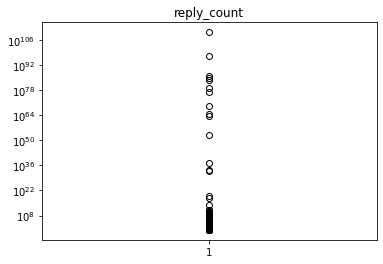

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


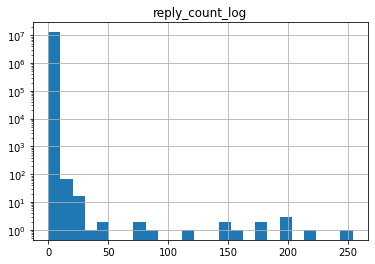

In [25]:
plot_boxplot(df_tweet, 'reply_count', log=True)
plot_hist(df_tweet[df_tweet['reply_count']!=np.inf], 'reply_count', log=True)

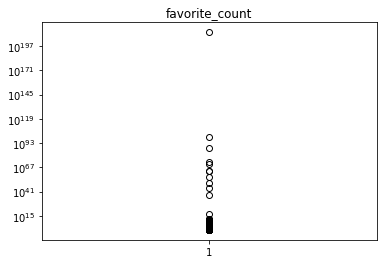

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


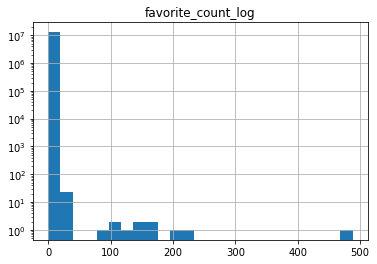

In [26]:
plot_boxplot(df_tweet, 'favorite_count', log=True)
plot_hist(df_tweet[df_tweet['favorite_count']!=np.inf], 'favorite_count', log=True)

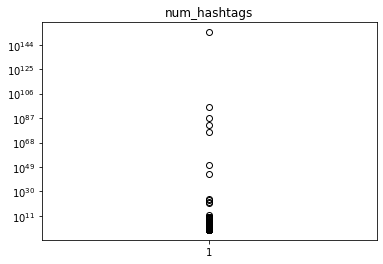

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


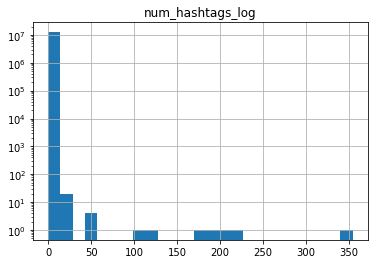

In [27]:
plot_boxplot(df_tweet, 'num_hashtags', log=True)
plot_hist(df_tweet[df_tweet['num_hashtags']!=np.inf], 'num_hashtags', log=True)

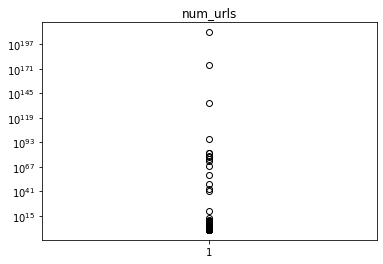

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


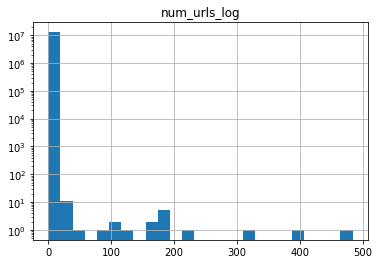

In [28]:
plot_boxplot(df_tweet, 'num_urls', log=True)
plot_hist(df_tweet[df_tweet['num_urls']!=np.inf], 'num_urls', log=True)

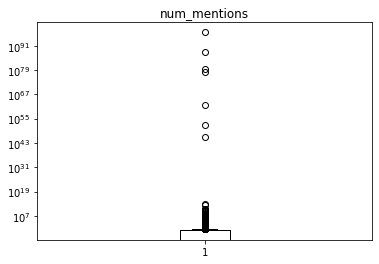

C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: divide by zero encountered in log
  transformed_df = pd.DataFrame()
C:\dev\DM_tweets\utilities.py:169: RuntimeWarning: invalid value encountered in log
  transformed_df = pd.DataFrame()


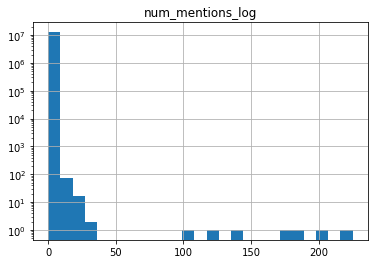

In [29]:
plot_boxplot(df_tweet, 'num_mentions', log=True)
plot_hist(df_tweet[df_tweet['num_mentions']!=np.inf], 'num_mentions', log=True)

## Tweets created_at analysis

In [30]:
# Convert date to seconds
df_tweet['created_at_conv'] = pd.to_datetime(df_tweet['created_at']).astype(np.int64)

Inside the publication date column there are 3 different distributions which can be seen.

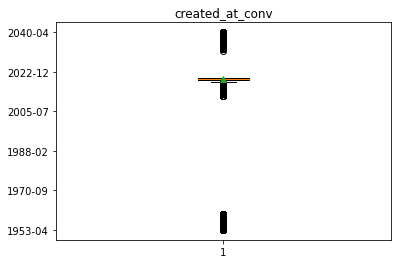

In [31]:
plot_boxplot(df_tweet, 'created_at_conv', date=True, out_path=plot_path+'tweets/boxplot_created_at_pre.png')

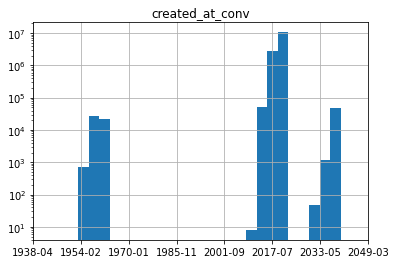

In [32]:
plot_hist(df_tweet, 'created_at_conv', date=True, out_path=plot_path+'tweets/hist_created_at_pre.png')

The oldest date lies in the year 1953, whereas the most recent in the year 2040. This values are noise.

In [33]:
print(f"min: {pd.to_datetime(df_tweet.created_at_conv.min())}"
      f"max: {pd.to_datetime(df_tweet.created_at_conv.max())}")

min: 1953-04-17 12:24:33max: 2040-04-27 11:03:25


## Correlation Matrix

In [34]:
df_corr = df_tweet.copy()
# Drop categorical attributes, and noisy and null values
df_corr.drop(columns=['id', 'user_id'], inplace=True)
for attr in attributes:
    df_corr = df_corr[(df_corr[attr] != -1) & df_corr[attr].notnull() & (df_corr[attr]< 1e7)]

The attributes are not correlated in any way.

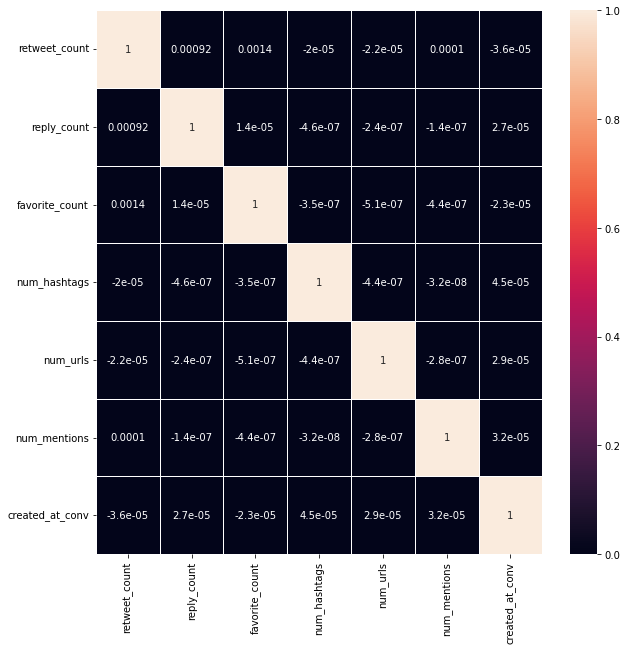

In [35]:
eval_correlation(df_corr, 'pearson')

In [36]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               object 
 1   user_id          object 
 2   retweet_count    float64
 3   reply_count      float64
 4   favorite_count   float64
 5   num_hashtags     float64
 6   num_urls         float64
 7   num_mentions     float64
 8   created_at       object 
 9   text             object 
 10  created_at_conv  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ GB


In [37]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11508 non-null  int64  
 1   name             11507 non-null  object 
 2   lang             11508 non-null  object 
 3   bot              11508 non-null  int64  
 4   created_at       11508 non-null  object 
 5   statuses_count   11109 non-null  float64
 6   created_at_conv  11508 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 629.5+ KB


In [38]:
df_users.id = df_users.id.astype(str)
df_merge = df_tweet.merge(df_users, left_on="user_id", right_on="id", how="right")

In [39]:
len(df_tweet.user_id.unique()) - len(df_merge.user_id.unique())

210778